**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

#DBSCAN - From scratch version:  Part A
Create the class DBSCAN and the following functions:
- Constructor:    
 - def __init__(self):  (provided)
-   Methods
 - def find_neighborhood_points(self, data, eps):
 - def find_point_labels(self, data, list_of_neighbors, minpts):
 - def find_point_labels(self, data, list_of_neighbors, minpts):
 - def expand_clusters(self, point_label, list_of_neighbors ):
 - def plot_clusters(self, data, labels, num_clusters):


To calculate distances, numpy.linalg.norm can be used:  
Recall:  $$||v||_p = \sum_i(|v_i|^p)^\frac{1}{p}$$  

L2 Norm = Euclidean Norm:  $$ ||v||_2 = \sum_i(|v_i|^2)^\frac{1}{2}$$  

So to find the Euclidean Distance:  $$ ||v||_2 = \sum_i(|d_1 - d_2|^2)^\frac{1}{2}$$ 

<br>

See the code cell below for implementation hints.


---



In [18]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import queue
import scipy.io as spio

class DBSCAN:
  def __init__(self):
    self.noise = 0
    self.core = -1
    self.border = -2

  def find_neighborhood_points(self, data, eps):
    #Create a list of neighbor points within eps of an input point
    #Calculate the Euclidean distance (L2 norm) and check if < eps
    #input:  data:  pre-clustered dataset, eps:  epsilon == radius of neighborhood 
    #return  list_of_neighbors:  list of points within eps of central point
    #                            contains a list for each data point index
    #Hint:  https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html 

    #Create a numpy array of the list of neighbors
    #Use numpy.asarray to avoid ragged list deprecated warnings
    #YOUR CODE HERE

    #       Loop over data to get a central point (core point candidate)
    #         Create list of points within eps of the current data point
    #         Loop over data to check all other points in dataset
    #           if central point to other data point distance <= eps
    #             add to list of points with eps of current data point
    #         append to list_of_neighbors      
    #YOUR CODE HERE
    list_of_neighbors = []
    for i in range(len(data)):
        neighbors = []
        for j in range(len(data)):
            if np.linalg.norm(data[i]-data[j]) <= eps:
                neighbors.append(j)
                list_of_neighbors.append(neighbors)
                return list_of_neighbors
    def find_point_labels(self, data, list_of_neighbors, minpts):
        
        core_point = []
        noncore_point = []
        point_label = []
        for i in range(len(list_of_neighbors)):
            if len(list_of_neighbors[i]) >= minpts:
                point_label.append(self.core)
                core_point.append(i)
            else:
                point_label.append(self.border)
                noncore_point.append(i)
                
        for i in noncore_point:
            for point in list_of_neighbors[i]:
                if point in core_point:
                    point_label[i] = self.border
                    break
    #Label all core, border, and noise points
    #See constructor for defintion of the core, border and noise labels
    #input:  data:  pre-clustered dataset, 
    #        list_of_neighbors:  list of neighborhood points for each data point 
    #        minpts:  minimum number of points within eps to be considered a core point
    #return: core_point:  list of points labeled as core points
    #        noncore_point:  list of points labeled as noncore points
    #        point_label:  list of labels applied to points in dataset 
    #                      prior to extending points in a cluster
    #Hint:   Create lists for core_point, noncore_point, point_label
    #        Loop over list_of_neighbors
    #           if list of neighbors size > minpts
    #             point_label is core for this data point
    #             append data index to core_point list
    #           else
    #             point_label is noncore for this data point
    #             append data index to noncore_point list
    #        Loop over noncore_point 
    #           For each point in list_of_neighbors
    #             if point is in core_point list
    #                point_label is border for this data point      
    #YOUR CODE HERE
        return core_point, noncore_point, point_label
    
    
    
    def expand_clusters(self, point_label, list_of_neighbors ):
        
        
        cluster_number = 1
        for i in range(len(point_label)):
            if point_label[i] == self.core:
                queue = []
                queue.extend(list_of_neighbors[i])
                point_label[i] = cluster_number
                while queue:
                    current_point = queue.pop(0)
                    if point_label[current_point] == self.core:
                        queue.extend(list_of_neighbors[current_point])
                        point_label[current_point] = cluster_number
                    elif point_label[current_point] == self.border:
                        point_label[current_point] = cluster_number
                cluster_number += 1
        return point_label, cluster_number-1
    #Expand cluster to include border points
    #See constructor for defintion of the core, border and noise labels
    #input:  point_label:  list of labels applied to points in dataset 
    #                      prior to extending points in a cluster
    #        list_of_neighbors:  list of points within eps of central point
    #return: point_label:  list of labels applied to points in dataset
    #                      after extending cluster to include border points
    #        cluster_number:  total number of clusters found
    #Hints:
    #   init cluster_number - start at 1
    #   loop over point_label
    #     initialize a Python Queue
    #     if point_label == core 
    #       update point_label with current cluster number
    #       loop over list_of_neighbors 
    #         if point_label == core
    #           add to Queue to consider extending further 
    #               (can only extend core points)
    #           update point label with current cluster number
    #         else if point_label == border
    #           update point label with current cluster number
    #           note, do NOT add to Queue since do not extend border points
    #       loop as long as Queue is not empty
    #         get list_of_neighbors of point popped from Queue
    #         loop over list_of_neighbors
    #           if point_label == core
    #             add to Queue to consider extending further 
    #             update point label with current cluster number
    #           else if point_label == border
    #             update point label with current cluster number
    #       increment cluster number
    #YOUR CODE HERE
    #return point_label, cluster_number
    
    
    #def plot_clusters(self, data, labels, num_clusters):
    #Generate a color-coded plot of the clusters 
    #Color code each cluster and the noise (outlier) points
    #input:  data:  pre-clustered dataset, 
    #        labels:  list of integer labels for clusters (0: noise, 1-n: clusters 1-n)
    #        num_clusters:  number of clusters found
    #return: None
    #Hint:  loop over num_clusters
    #       choose from a list of clusters for each cluster number
    #       display on scatterplot
    #YOUR CODE HERE
    
    
    def plot_clusters(self, data, labels, num_clusters):
        cmap = plt.get_cmap('viridis')
        colors = [cmap(i) for i in np.linspace(0, 1, num_clusters+1)]
        for i in range(num_clusters+1):
            if i==0:
                col=[0,0,0,1]
            else:
                col=colors[i]
            cluster = data[np.where(np.array(labels)==i)]
            plt.scatter(cluster[:,0], cluster[:,1], c=[col], label='Cluster '+str(i))
        plt.legend()
        plt.show()
        
        
#Run the doctest module.  DO NOT modify any code below this line!
import doctest


X = np.array([[1,9],[3,1],[4,13],[6,11],
              [7,12],[7,15],[8,13],[8,11],
              [7,10],[8,9],[10,9],[8,13],
              [8,12],[9,13],[9,8],[9,14],
              [10,9],[11,10],[8,8],[9,10],
              [10,6],[10,11],[10,12],[11,13],
              [10,7],[11,8],[11,9],[12,9],
              [12,5],[12,7],[12,15], [12,16],
              [13,8],[13,6],[13,17],[14,5],
              [14,7],[15,3],[15,5],[15,10],
              [15,12],[15,14],[16,6],[16,10],
              [16,11],[16,13],[17,3],[17,5],
              [18,6],[18,10],[19,12],[20,11],
              [26,9]])

dbs = DBSCAN()

point_neighbors = dbs.find_neighborhood_points(X, 2)
core_points, noncore_points, point_labels_preextend = dbs.find_point_labels(X, point_neighbors, 4)
point_labels_preextend_doctest = point_labels_preextend.copy()
point_labels, num_clusters = dbs.expand_clusters(point_labels_preextend, point_neighbors)

dbs.plot_clusters(X, point_labels, num_clusters)



"""
   >>> print(point_neighbors)
   [[0], [1], [2], [3, 4, 7, 8], [3, 4, 6, 7, 8, 11, 12], [5], [4, 6, 7, 11, 12, 13, 15], [3, 4, 6, 7, 8, 9, 11, 12, 19, 21], [3, 4, 7, 8, 9, 19], [7, 8, 9, 10, 14, 16, 18, 19], [9, 10, 14, 16, 17, 19, 21, 24, 25, 26, 27], [4, 6, 7, 11, 12, 13, 15], [4, 6, 7, 11, 12, 13, 22], [6, 11, 12, 13, 15, 22, 23], [9, 10, 14, 16, 18, 19, 24, 25], [6, 11, 13, 15], [9, 10, 14, 16, 17, 19, 21, 24, 25, 26, 27], [10, 16, 17, 19, 21, 25, 26, 27], [9, 14, 18], [7, 8, 9, 10, 14, 16, 17, 19, 21], [20, 24], [7, 10, 16, 17, 19, 21, 22], [12, 13, 21, 22, 23], [13, 22, 23], [10, 14, 16, 20, 24, 25, 29], [10, 14, 16, 17, 24, 25, 26, 27, 29, 32], [10, 16, 17, 25, 26, 27], [10, 16, 17, 25, 26, 27, 29, 32], [28, 29, 33, 35], [24, 25, 27, 28, 29, 32, 33, 36], [30, 31], [30, 31, 34], [25, 27, 29, 32, 33, 36], [28, 29, 32, 33, 35, 36], [31, 34], [28, 33, 35, 36, 38], [29, 32, 33, 35, 36], [37, 38, 46], [35, 37, 38, 42, 47], [39, 40, 43, 44], [39, 40, 41, 44, 45], [40, 41, 45], [38, 42, 47, 48], [39, 43, 44, 49], [39, 40, 43, 44, 45], [40, 41, 44, 45], [37, 46, 47], [38, 42, 46, 47, 48], [42, 47, 48], [43, 49], [50, 51], [50, 51], [52]]
   >>> print(core_points)
   [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 24, 25, 26, 27, 28, 29, 32, 33, 35, 36, 38, 39, 40, 42, 43, 44, 45, 47]
   >>> print(noncore_points)
   [0, 1, 2, 5, 18, 20, 23, 30, 31, 34, 37, 41, 46, 48, 49, 50, 51, 52]
   >>> print(point_labels_preextend_doctest)
   [0, 0, 0, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, 0, -1, -1, -2, -1, -1, -1, -2, -1, -1, -1, -1, -2, -1, -2, -2, 0, 0, 0]
   >>> print(point_labels)
   [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0]
   >>> print(num_clusters)
   3
"""



doctest.testmod()


AttributeError: 'DBSCAN' object has no attribute 'find_point_labels'

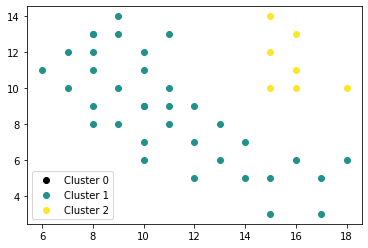

**********************************************************************
File "__main__", line 9, in __main__
Failed example:
    print(point_labels_preextend_doctest)
Expected:
    [0, 0, 0, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, 0, -1, -1, -2, -1, -1, -1, -2, -1, -1, -1, -1, -2, -1, -2, -2, 0, 0, 0]
Got:
    [-2, -2, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -2, -1, -1, -2, -1, -1, -1, -2, -1, -1, -1, -1, -2, -1, -2, -2, -2, -2, -2]
**********************************************************************
File "__main__", line 11, in __main__
Failed example:
    print(point_labels)
Expected:
    [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0]
Got:
    [-2, -2, -2, 1, 1, -2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

TestResults(failed=3, attempted=6)

In [19]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import queue
import scipy.io as spio

class DBSCAN:
    def __init__(self):
        self.noise = 0
        self.core = -1
        self.border = -2

    def find_neighborhood_points(self, data, eps):
        list_of_neighbors = []
        for i in range(len(data)):
            neighbors = []
            for j in range(len(data)):
                if np.linalg.norm(data[i]-data[j]) <= eps:
                    neighbors.append(j)
            list_of_neighbors.append(neighbors)
        return list_of_neighbors

    def find_point_labels(self, data, list_of_neighbors, minpts):
        core_point = []
        noncore_point = []
        point_label = []
        for i in range(len(list_of_neighbors)):
            if len(list_of_neighbors[i]) >= minpts:
                point_label.append(self.core)
                core_point.append(i)
            else:
                point_label.append(self.border)
                noncore_point.append(i)
                
        for i in noncore_point:
            for point in list_of_neighbors[i]:
                if point in core_point:
                    point_label[i] = self.border
                    break
        return core_point, noncore_point, point_label

    def expand_clusters(self, point_label, list_of_neighbors):
        cluster_number = 1
        for i in range(len(point_label)):
            if point_label[i] == self.core:
                queue = []
                queue.extend(list_of_neighbors[i])
                point_label[i] = cluster_number
                while queue:
                    current_point = queue.pop(0)
                    if point_label[current_point] == self.core:
                        queue.extend(list_of_neighbors[current_point])
                        point_label[current_point] = cluster_number
                    elif point_label[current_point] == self.border:
                        point_label[current_point] = cluster_number
                cluster_number += 1
        return point_label, cluster_number-1

    def plot_clusters(self, data, labels, num_clusters):
        cmap = plt.get_cmap('viridis')
        colors = [cmap(i) for i in np.linspace(0, 1, num_clusters+1)]
        for i in range(num_clusters+1):
            if i==0:
                col=[0,0,0,1]
            else:
                col=colors[i]
            cluster = data[np.where(np.array(labels)==i)]
            plt.scatter(cluster[:,0], cluster[:,1], c=[col], label='Cluster '+str(i))
        plt.legend()
        plt.show()


#Run the doctest module.  DO NOT modify any code below this line!
import doctest


X = np.array([[1,9],[3,1],[4,13],[6,11],
              [7,12],[7,15],[8,13],[8,11],
              [7,10],[8,9],[10,9],[8,13],
              [8,12],[9,13],[9,8],[9,14],
              [10,9],[11,10],[8,8],[9,10],
              [10,6],[10,11],[10,12],[11,13],
              [10,7],[11,8],[11,9],[12,9],
              [12,5],[12,7],[12,15], [12,16],
              [13,8],[13,6],[13,17],[14,5],
              [14,7],[15,3],[15,5],[15,10],
              [15,12],[15,14],[16,6],[16,10],
              [16,11],[16,13],[17,3],[17,5],
              [18,6],[18,10],[19,12],[20,11],
              [26,9]])

dbs = DBSCAN()

point_neighbors = dbs.find_neighborhood_points(X, 2)
core_points, noncore_points, point_labels_preextend = dbs.find_point_labels(X, point_neighbors, 4)
point_labels_preextend_doctest = point_labels_preextend.copy()
point_labels, num_clusters = dbs.expand_clusters(point_labels_preextend, point_neighbors)

dbs.plot_clusters(X, point_labels, num_clusters)



"""
   >>> print(point_neighbors)
   [[0], [1], [2], [3, 4, 7, 8], [3, 4, 6, 7, 8, 11, 12], [5], [4, 6, 7, 11, 12, 13, 15], [3, 4, 6, 7, 8, 9, 11, 12, 19, 21], [3, 4, 7, 8, 9, 19], [7, 8, 9, 10, 14, 16, 18, 19], [9, 10, 14, 16, 17, 19, 21, 24, 25, 26, 27], [4, 6, 7, 11, 12, 13, 15], [4, 6, 7, 11, 12, 13, 22], [6, 11, 12, 13, 15, 22, 23], [9, 10, 14, 16, 18, 19, 24, 25], [6, 11, 13, 15], [9, 10, 14, 16, 17, 19, 21, 24, 25, 26, 27], [10, 16, 17, 19, 21, 25, 26, 27], [9, 14, 18], [7, 8, 9, 10, 14, 16, 17, 19, 21], [20, 24], [7, 10, 16, 17, 19, 21, 22], [12, 13, 21, 22, 23], [13, 22, 23], [10, 14, 16, 20, 24, 25, 29], [10, 14, 16, 17, 24, 25, 26, 27, 29, 32], [10, 16, 17, 25, 26, 27], [10, 16, 17, 25, 26, 27, 29, 32], [28, 29, 33, 35], [24, 25, 27, 28, 29, 32, 33, 36], [30, 31], [30, 31, 34], [25, 27, 29, 32, 33, 36], [28, 29, 32, 33, 35, 36], [31, 34], [28, 33, 35, 36, 38], [29, 32, 33, 35, 36], [37, 38, 46], [35, 37, 38, 42, 47], [39, 40, 43, 44], [39, 40, 41, 44, 45], [40, 41, 45], [38, 42, 47, 48], [39, 43, 44, 49], [39, 40, 43, 44, 45], [40, 41, 44, 45], [37, 46, 47], [38, 42, 46, 47, 48], [42, 47, 48], [43, 49], [50, 51], [50, 51], [52]]
   >>> print(core_points)
   [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 24, 25, 26, 27, 28, 29, 32, 33, 35, 36, 38, 39, 40, 42, 43, 44, 45, 47]
   >>> print(noncore_points)
   [0, 1, 2, 5, 18, 20, 23, 30, 31, 34, 37, 41, 46, 48, 49, 50, 51, 52]
   >>> print(point_labels_preextend_doctest)
   [0, 0, 0, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, 0, -1, -1, -2, -1, -1, -1, -2, -1, -1, -1, -1, -2, -1, -2, -2, 0, 0, 0]
   >>> print(point_labels)
   [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0]
   >>> print(num_clusters)
   3
"""



doctest.testmod()


In [20]:
class DBSCAN:
  def __init__(self):
    self.noise = 0
    self.core = -1
    self.border = -2

  def find_neighborhood_points(self, data, eps):
    list_of_neighbors = []
    for i in range(data.shape[0]):
      neighbors = [j for j in range(data.shape[0]) if np.linalg.norm(data[i]-data[j]) <= eps]
      list_of_neighbors.append(neighbors)
    return np.asarray(list_of_neighbors)

  def find_point_labels(self, data, list_of_neighbors, minpts):
    core_point = []
    noncore_point = []
    point_label = [self.noise] * data.shape[0]
    for i in range(data.shape[0]):
      if len(list_of_neighbors[i]) >= minpts:
        point_label[i] = self.core
        core_point.append(i)
      else:
        noncore_point.append(i)
    for i in noncore_point:
      for j in list_of_neighbors[i]:
        if point_label[j] == self.core:
          point_label[i] = self.border
    return core_point, noncore_point, point_label

  def expand_clusters(self, point_label, list_of_neighbors):
    cluster_number = 1
    for i in range(len(point_label)):
      if point_label[i] == self.core:
        q = queue.Queue()
        q.put(i)
        while not q.empty():
          cur = q.get()
          point_label[cur] = cluster_number
          for neighbor in list_of_neighbors[cur]:
            if point_label[neighbor] == self.core:
              q.put(neighbor)
              point_label[neighbor] = cluster_number
            elif point_label[neighbor] == self.border:
              point_label[neighbor] = cluster_number
        cluster_number += 1
    return point_label, cluster_number - 1

  def plot_clusters(self, data, labels, num_clusters):
    colors = plt.cm.Spectral(np.linspace(0, 1, num_clusters + 1))
    for i in range(num_clusters + 1):
      plt.scatter(data[labels == i, 0], data[labels == i, 1], color=colors[i])
    plt.show()


C:\Miniconda3\envs\workspace-gpu\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


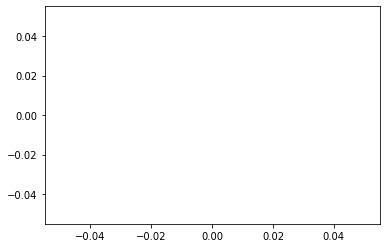

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(point_neighbors)
Expected:
    [[0], [1], [2], [3, 4, 7, 8], [3, 4, 6, 7, 8, 11, 12], [5], [4, 6, 7, 11, 12, 13, 15], [3, 4, 6, 7, 8, 9, 11, 12, 19, 21], [3, 4, 7, 8, 9, 19], [7, 8, 9, 10, 14, 16, 18, 19], [9, 10, 14, 16, 17, 19, 21, 24, 25, 26, 27], [4, 6, 7, 11, 12, 13, 15], [4, 6, 7, 11, 12, 13, 22], [6, 11, 12, 13, 15, 22, 23], [9, 10, 14, 16, 18, 19, 24, 25], [6, 11, 13, 15], [9, 10, 14, 16, 17, 19, 21, 24, 25, 26, 27], [10, 16, 17, 19, 21, 25, 26, 27], [9, 14, 18], [7, 8, 9, 10, 14, 16, 17, 19, 21], [20, 24], [7, 10, 16, 17, 19, 21, 22], [12, 13, 21, 22, 23], [13, 22, 23], [10, 14, 16, 20, 24, 25, 29], [10, 14, 16, 17, 24, 25, 26, 27, 29, 32], [10, 16, 17, 25, 26, 27], [10, 16, 17, 25, 26, 27, 29, 32], [28, 29, 33, 35], [24, 25, 27, 28, 29, 32, 33, 36], [30, 31], [30, 31, 34], [25, 27, 29, 32, 33, 36], [28, 29, 32, 33, 35, 36], [31, 34], [28, 33, 3

TestResults(failed=2, attempted=6)

In [21]:
#Run the doctest module.  DO NOT modify any code below this line!
import doctest


X = np.array([[1,9],[3,1],[4,13],[6,11],
              [7,12],[7,15],[8,13],[8,11],
              [7,10],[8,9],[10,9],[8,13],
              [8,12],[9,13],[9,8],[9,14],
              [10,9],[11,10],[8,8],[9,10],
              [10,6],[10,11],[10,12],[11,13],
              [10,7],[11,8],[11,9],[12,9],
              [12,5],[12,7],[12,15], [12,16],
              [13,8],[13,6],[13,17],[14,5],
              [14,7],[15,3],[15,5],[15,10],
              [15,12],[15,14],[16,6],[16,10],
              [16,11],[16,13],[17,3],[17,5],
              [18,6],[18,10],[19,12],[20,11],
              [26,9]])

dbs = DBSCAN()

point_neighbors = dbs.find_neighborhood_points(X, 2)
core_points, noncore_points, point_labels_preextend = dbs.find_point_labels(X, point_neighbors, 4)
point_labels_preextend_doctest = point_labels_preextend.copy()
point_labels, num_clusters = dbs.expand_clusters(point_labels_preextend, point_neighbors)

dbs.plot_clusters(X, point_labels, num_clusters)



"""
   >>> print(point_neighbors)
   [[0], [1], [2], [3, 4, 7, 8], [3, 4, 6, 7, 8, 11, 12], [5], [4, 6, 7, 11, 12, 13, 15], [3, 4, 6, 7, 8, 9, 11, 12, 19, 21], [3, 4, 7, 8, 9, 19], [7, 8, 9, 10, 14, 16, 18, 19], [9, 10, 14, 16, 17, 19, 21, 24, 25, 26, 27], [4, 6, 7, 11, 12, 13, 15], [4, 6, 7, 11, 12, 13, 22], [6, 11, 12, 13, 15, 22, 23], [9, 10, 14, 16, 18, 19, 24, 25], [6, 11, 13, 15], [9, 10, 14, 16, 17, 19, 21, 24, 25, 26, 27], [10, 16, 17, 19, 21, 25, 26, 27], [9, 14, 18], [7, 8, 9, 10, 14, 16, 17, 19, 21], [20, 24], [7, 10, 16, 17, 19, 21, 22], [12, 13, 21, 22, 23], [13, 22, 23], [10, 14, 16, 20, 24, 25, 29], [10, 14, 16, 17, 24, 25, 26, 27, 29, 32], [10, 16, 17, 25, 26, 27], [10, 16, 17, 25, 26, 27, 29, 32], [28, 29, 33, 35], [24, 25, 27, 28, 29, 32, 33, 36], [30, 31], [30, 31, 34], [25, 27, 29, 32, 33, 36], [28, 29, 32, 33, 35, 36], [31, 34], [28, 33, 35, 36, 38], [29, 32, 33, 35, 36], [37, 38, 46], [35, 37, 38, 42, 47], [39, 40, 43, 44], [39, 40, 41, 44, 45], [40, 41, 45], [38, 42, 47, 48], [39, 43, 44, 49], [39, 40, 43, 44, 45], [40, 41, 44, 45], [37, 46, 47], [38, 42, 46, 47, 48], [42, 47, 48], [43, 49], [50, 51], [50, 51], [52]]
   >>> print(core_points)
   [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 24, 25, 26, 27, 28, 29, 32, 33, 35, 36, 38, 39, 40, 42, 43, 44, 45, 47]
   >>> print(noncore_points)
   [0, 1, 2, 5, 18, 20, 23, 30, 31, 34, 37, 41, 46, 48, 49, 50, 51, 52]
   >>> print(point_labels_preextend_doctest)
   [0, 0, 0, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, 0, -1, -1, -2, -1, -1, -1, -2, -1, -1, -1, -1, -2, -1, -2, -2, 0, 0, 0]
   >>> print(point_labels)
   [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0]
   >>> print(num_clusters)
   3
"""



doctest.testmod()


#DBSCAN - From scratch version:  Part B
Extend your model to different combinations of eps and minpts.
Evaluate and comment on your results.

In [23]:
#Use your dataset and class methods from Part A to evaluate different values for eps and minpts.
#YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import queue

class DBSCAN2:
    def __init__(self):
        self.noise = 0
        self.core = -1
        self.border = -2

    def find_neighborhood_points(self, data, eps):
        list_of_neighbors = []
        for i in range(data.shape[0]):
            neighbors = [j for j in range(data.shape[0]) if np.linalg.norm(data[i]-data[j]) <= eps]
            list_of_neighbors.append(neighbors)
        return np.asarray(list_of_neighbors)

    def find_point_labels(self, data, list_of_neighbors, minpts):
        core_point = []
        noncore_point = []
        point_label = [self.noise] * data.shape[0]
        for i in range(data.shape[0]):
            if len(list_of_neighbors[i]) >= minpts:
                point_label[i] = self.core
                core_point.append(i)
            else:
                noncore_point.append(i)
        for i in noncore_point:
            for j in list_of_neighbors[i]:
                if point_label[j] == self.core:
                    point_label[i] = self.border
        return core_point, noncore_point, point_label

    def expand_clusters(self, point_label, list_of_neighbors):
        cluster_number = 1
        for i in range(len(point_label)):
            if point_label[i] == self.core:
                q = queue.Queue()
                q.put(i)
                while not q.empty():
                    cur = q.get()
                    point_label[cur] = cluster_number
                    for neighbor in list_of_neighbors[cur]:
                        if point_label[neighbor] == self.core:
                            q.put(neighbor)
                            point_label[neighbor] = cluster_number
                        elif point_label[neighbor] == self.border:
                            point_label[neighbor] = cluster_number
                cluster_number += 1
        return point_label, cluster_number - 1

    def plot_clusters(self, data, labels, num_clusters):
        colors = plt.cm.Spectral(np.linspace(0, 1, num_clusters + 1))
        for i in range(num_clusters + 1):
            plt.scatter(data[labels == i, 0], data[labels == i, 1], color=colors[i])
        plt.show()

    def run(self, data, eps_values, minpts_values):
        for eps in eps_values:
            for minpts in minpts_values:
                list_of_neighbors = self.find_neighborhood_points(data, eps)
                core_point, noncore_point, point_label = self.find_point_labels(data, list_of_neighbors, minpts)
                labels, num_clusters = self.expand_clusters(point_label, list_of_neighbors)
                self.plot_clusters(data, labels, num_clusters)


In [ ]:
dbscan = DBSCAN2()
dbscan.run(data, eps_values=[0.3, 0.5, 0.7], minpts_values=[5, 7, 10])


#DBSCAN - From scratch version:  Part C
Evaluate the performance using Mean Silhouette Coefficient
If the true cluster labels are unknown, the model itself can be used to evaluate performance using the Silhouette Coefficient.

The Silhouette Coefficient range is [-1, 1], with best value == 1 and worst == -1.  A higher score indicates that the model has well defined and more dense clusters. Values close to 0 indicate overlapping clusters, while negative values usually indicate that data points have been assigned to the wrong clusters. 
Ref paper:  [Silhouettes: A graphical aid to the interpretation and validation of cluster analysis](https://www.sciencedirect.com/science/article/pii/0377042787901257?via%3Dihub)
<br>
<br>

># $s=\frac{b-a}{max(b-a)}$


<br>
where:  

- a: The average distance between one data point and all other points in the same cluster
- b: The average distance between one data point and all other points in the next nearest cluster.

Hint:  
See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html for more information on the silhouette score.


In [ ]:
#Use your dataset and class methods from Part A and your modified hyperparameters 
#from Part B to score the clustering performance.
#YOUR CODE HERE

#DBSCAN - Using scikit-learn

**Part A:**  
Implement the following:
- Create a "make_moons" dataset with with 500 samples and noise = 0.1
- Plot the unclustered dataset on a scatterplot
- Cluster the dataset using sklearn with eps=0.15, min_samples=10
- Print out the number of clusters, number of noise points, and cluster labels
- Plot the clustered dataset with color-coded clusters
- Run and printout the silhouette score


**Part B:**  
Implement the following:
- Create a "make_blobs" dataset with with 100 samples and std deviation = 0.9
- Plot the unclustered dataset on a scatterplot
- Cluster the dataset using sklearn with eps=1, min_samples=10
- Print out the number of clusters, number of noise points, and cluster labels
- Plot the clustered dataset with color-coded clusters
- Run and printout the silhouette score



In [ ]:
#Part A:  YOUR CODE HERE

In [ ]:
#Part B:  YOUR CODE HERE